In [ ]:
!pip install tensorflowjs               

In [ ]:
import tensorflowjs as tfjs             

In [ ]:
import pathlib                            
import matplotlib.pyplot as plt           
from IPython.display import HTML         
import tensorflow as tf                 

In [ ]:
import matplotlib.pyplot as plt                                
import tensorflow as tf                         
from tensorflow import keras                         
from tensorflow.keras import models, layers         

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    pathlib.Path('/content/drive/MyDrive/Tree-noTree'),
    seed=123,
    shuffle=True,
)

Found 1000 files belonging to 2 classes.


In [ ]:
for image_batch, label_batch in ds.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  # dimensions  1920*1061

(32, 256, 256, 3)
[0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1]


In [ ]:
cn = ds.class_names
cn

['no tree-0', 'tree-1']

In [ ]:
len(ds)

32

In [ ]:
train_size = 0.8
len(ds)*train_size

25.6

In [ ]:
train_ds = ds.take(16)
len(train_ds)


16

In [ ]:
test_ds = ds.skip(16) 
len(test_ds)

16

In [ ]:
val_size=0.1
len(ds)*val_size

3.2

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)  
len(test_ds)               

10

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)     
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)   

In [ ]:
scaling = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256,256),
  layers.experimental.preprocessing.Rescaling(1.0/255), 
])

In [ ]:
aug = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2), 
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (aug(x, training=True), y) 
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (32,256,256,3)
model = models.Sequential([
    scaling,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (32, 60, 60, 64)         

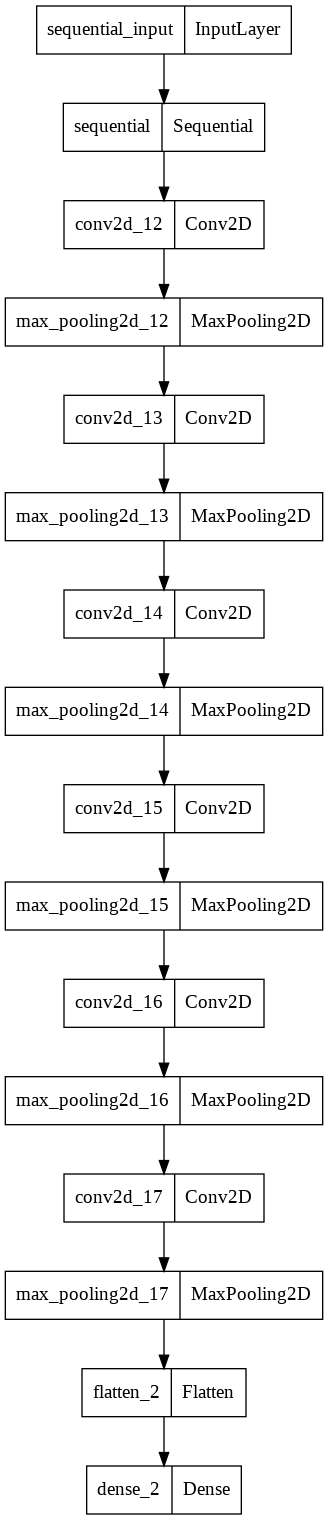

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
plot_model(model) 

In [ ]:
model.compile( 
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
training = model.fit(  
    train_ds, 
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=1, 
)

16/16 [==============================] - 233s 7s/step - loss: 1.3260 - accuracy: 0.4375 - val_loss: 0.6907 - val_accuracy: 0.4948


In [ ]:
accuracy=model.evaluate(test_ds) 
accuracy # with 1 epochs

10/10 [==============================] - 33s 1s/step - loss: 0.6920 - accuracy: 0.5000


[0.6920028328895569, 0.5]

In [ ]:
accuracy=model.evaluate(test_ds) 
accuracy  # with 5 epochs

10/10 [==============================] - 26s 748ms/step - loss: 0.6604 - accuracy: 0.5068


[0.6604228615760803, 0.5067567825317383]

first image to predict
actual label: no tree-0
predicted label: 0


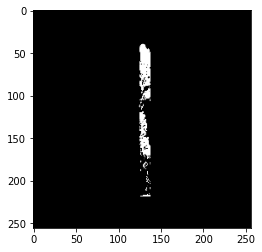

In [ ]:
import numpy as np
from os import path
for images_batch, labels_batch in test_ds.take(1):
    
  f_image = images_batch[0].numpy().astype('uint8')
  f_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(f_image)
  
  print("actual label:",cn[f_label])

  batch_predict = model.predict(images_batch)
   #print("predicted label:",cn[np.argmax(batch_predict[1])],"Hello world")
  if cn[np.argmax(batch_predict[1])] == 'no tree-0':
     print("predicted label:",0)
  else: 
    print(1)


first image to predict
actual label: no tree-0
predicted label: 0


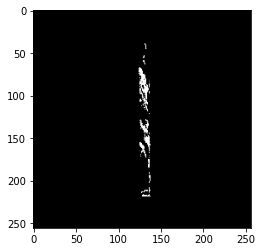

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    f_image = images_batch[0].numpy().astype('uint8')
    f_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(f_image)
    print("actual label:",cn[f_label])
    
    batch_predict = model.predict(images_batch)   
    #print("predicted label:",cn[np.argmax(batch_predict[1])],"Hello world")
    if cn[np.argmax(batch_predict[1])] == 'no tree-0':
      print("predicted label:",0)
    else: 
      print(1)



Image to predict is below: 
predicted label: 0


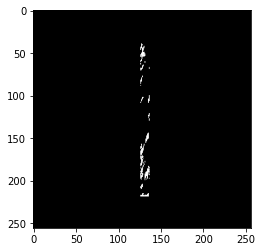

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    f_image = images_batch[0].numpy().astype('uint8')
    f_label = labels_batch[0].numpy()
    
    print("Image to predict is below: ")
    plt.imshow(f_image)
    
    batch_predict = model.predict(images_batch)
    #print("predicted label:",cn[np.argmax(batch_predict[1])],"Hello world")
    if cn[np.argmax(batch_predict[1])] == 'no tree-0':
      print("predicted label:",0)
    else: 
      print(1)


In [ ]:
def predict(img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = cn[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    f_image = images_batch[0].numpy().astype('uint8')
    f_label = labels_batch[0].numpy()
    
    print("Image to predict is below: ")
    plt.imshow(f_image)
    
    batch_predict = model.predict(images_batch)
    print("predicted label:",cn[np.argmax(batch_predict[1])])

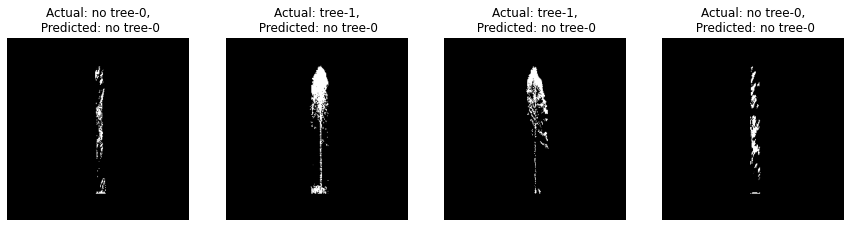

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(4):
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(images[i].numpy())
        actual_class = cn[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")

##DONE